In [2]:
import pandas as pd
import os
from skimage.transform import resize
from skimage.io import imread
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [13]:
data_exp_path = os.getcwd()
pca_path = os.path.abspath(os.path.join(data_exp_path, '../'))
repo_path = os.path.abspath(os.path.join(pca_path, '../'))
data_path = os.path.abspath(os.path.join(repo_path, '../data'))
augmented_dataset = os.path.abspath(os.path.join(data_path, 'AugmentedAlzheimerDataset'))
original_dataset = os.path.abspath(os.path.join(data_path, 'OriginalDataset'))

# Example of how this works on subset of data

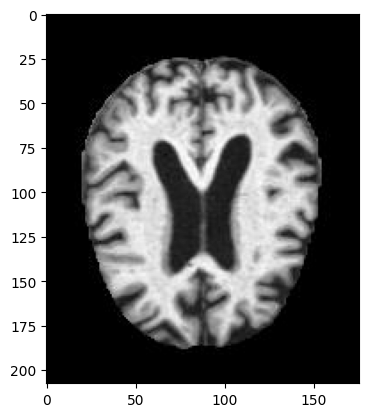

In [14]:
img = imread(original_dataset + '\\MildDemented\\' + os.listdir(original_dataset + '\\MildDemented')[0])
img = img.astype(np.uint8)
plt.imshow(img, cmap='gray')

In [15]:
mild_demented_list = []
mild_demented_path = original_dataset + '\\MildDemented\\'

counter = 0
for image in os.listdir(mild_demented_path):
    image_path = mild_demented_path + image
    
    cur_image = plt.imread(image_path).flatten()
    
    mild_demented_list.append(cur_image)
    if counter % 250 == 0:
        print("Completed", counter)
    counter += 1
    
mild_demented_arr = np.array(mild_demented_list)

Completed 0
Completed 250
Completed 500
Completed 750


In [16]:
mild_demented_arr.shape

(896, 36608)

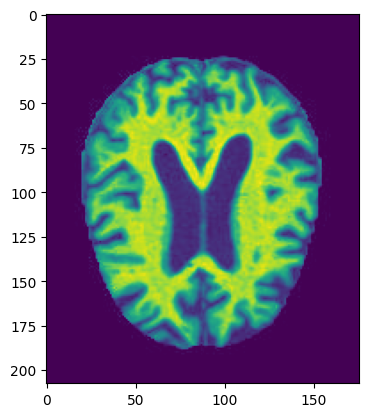

In [17]:
#mild_demented_arr[0].reshape(176, 208)
plt.imshow(mild_demented_arr[0].reshape(208, 176))

In [4]:
from sklearn import svm
from sklearn.svm import SVC
import pickle
import random

In [9]:
dir = 'C:\\Users\\azhan\\cs4262-5262-2023S\\data\\OriginalDataset'

dataset = []

categories = ['MildDemented', 'ModerateDemented', 'NonDemented', 'VeryMildDemented']

for category in categories:
    path = os.path.join(dir, category)
    label = categories.index(category)
    for img in os.listdir(path):
        imgpath = os.path.join(path, img)
        brain_img = imread(imgpath, 0)
        image = np.array(brain_img).flatten()
        dataset.append([image, label])
# print(len(dataset))

In [10]:
pick_in = open('data1.pickle', 'wb')
pickle.dump(dataset, pick_in)
pick_in.close()

# import pickle as pk

# with open("svm.pkl", "wb") as pickle_file:
#     pk.dump(hw_svm, pickle_file)

In [11]:
pick_in = open('data1.pickle', 'rb')
data = pickle.load(pick_in)
pick_in.close()

random.shuffle(data)
features = []
labels = []

for feature, label in data:
    features.append(feature)
    labels.append(label)
    
xtrain, xtest, ytrain, ytest = train_test_split(features, labels, test_size = 0.2)

# Run the model

In [ ]:
# Redo to find optimal values
model = SVC(C = 1, kernel = 'poly', gamma = 'auto')
model.fit(xtrain, ytrain)

# Generate pickle file to save time
pick = open('model.pickle', 'wb')
pickle.dump(model, pick)
pick.close()

In [12]:
pick = open('model.pickle', 'rb')
model = pickle.load(pick)
pick.close()

In [13]:
prediction = model.predict(xtest)
accuracy = model.score(xtest, ytest)

print('Accuracy: ', accuracy)
print('Prediction: ', categories[prediction[0]])

Accuracy:  1.0
Prediction:  NonDemented


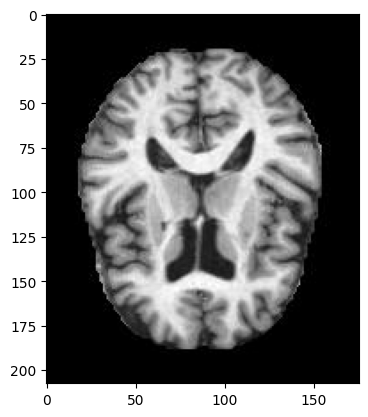

In [14]:
brain = xtest[0].reshape(208, 176)
# plt.imshow(brain)
plt.imshow(brain, cmap = 'gray')
plt.show()
print()

In [15]:
# add f1 metric, reorganize pickle files, adjust C, kernel, and gamma